## Linear Regression란?

입력한 데이터를 바탕으로 모델을 생성할 때 이 모델이 선(line)의 형태로 되어있고 이 선을 찾는 분석 방법을 Linear Regression 분석이라 부른다. 

가장 간단한 1차원 함수를 생각해보면,

y = mx + b로 표현할 수 있고

여기서 x는 입력 데이터이고 학습을 통해 m, b를 찾아가서 새로운 x에 대해 y를 예측

결국 우리가 찾고자하는 것은 기울기 m과 절편 b이다! 그럼 어떤 것을 기준으로? -> Loss

## Loss

여기서 loss는 어떤 것을 의미할까?

1차 함수로 그래프를 그린다고 상상해보자.

입력 데이터가 (x,y)로 그래프에 표시되어 있고, 그 사이를 지나가는 우리의 모델 1차 함수

이때, 1차 함수랑 입력 데이터간 거리 차이가 loss가 된다.

그럼 모든 입력 데이터와의 loss를 어떻게 측정할까?

### 평균 제곱 오차 (Mean Squared Error, mse)

단순히 모델과 입력 데이터 사이의 차이로 계산을 하면 어떤 데이터는 loss가 +, 다른 데이터는 loss가 -로 이들을 다 더하면 전체적인 loss를 계산하기 어렵다.

따라서 +, -에 관계없이 동일하게 반영되도록 하기위해 모든 loss에 제곱을 해준다. 이를 평균 제곱 오차라 부른다.

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100, 1)
y = 4 +  3 * x + np.random.randn(100,1)


linear = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, y)
linear.fit(X_train, Y_train)
prediction = linear.predict(X_test)
print(linear.score(X_test, Y_test)*100,end = '%\n')

65.88246150000406%


## test set에 대한 모델 

65.88246150000406%


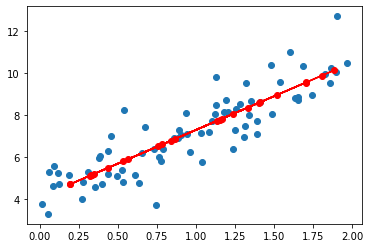

In [38]:
plt.scatter(X_train,Y_train, label="train data")
plt.plot(X_test, prediction, marker="o", color = 'red')
print(linear.score(X_test, Y_test)*100,end = '%\n')

## Tensorflow로 선형회귀 구현

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_train = [1, 2, 3]
y_train = [4, 5, 6]

W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

h = W*x_train+b
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim = 1))
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='mse',optimizer=sgd)
model.summary()

hist = model.fit(x_train, y_train, epochs=30)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1/1 [==============================] - 0s 120ms/step - loss: 41.5590
Epoch 2/30
1/1 [==============================] - 0s 5ms/step - loss: 32.9567
Epoch 3/30
1/1 [==============================] - 0s 10ms/step - loss: 26.1566
Epoch 4/30
1/1 [==============================] - 0s 5ms/step - loss: 20.7809
Epoch 5/30
1/1 [==============================] - 0s 7ms/step - loss: 16.5312
Epoch 6/30
1/1 [==============================] - 0s 9ms/step - loss: 13.1716
Epoch 7/30
1/1 [==============================] - 0s 5ms/step - loss: 10.5155
Epoch 8/30
1/1 [=======================

2022-08-24 02:30:44.575155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 4ms/step - loss: 4.4036
Epoch 12/30
1/1 [==============================] - 0s 4ms/step - loss: 3.5824
Epoch 13/30
1/1 [==============================] - 0s 4ms/step - loss: 2.9328
Epoch 14/30
1/1 [==============================] - 0s 4ms/step - loss: 2.4188
Epoch 15/30
1/1 [==============================] - 0s 5ms/step - loss: 2.0120
Epoch 16/30
1/1 [==============================] - 0s 5ms/step - loss: 1.6900
Epoch 17/30
1/1 [==============================] - 0s 6ms/step - loss: 1.4350
Epoch 18/30
1/1 [==============================] - 0s 6ms/step - loss: 1.2330
Epoch 19/30
1/1 [==============================] - 0s 5ms/step - loss: 1.0728
Epoch 20/30
1/1 [==============================] - 0s 5ms/step - loss: 0.9457
Epoch 21/30
1/1 [==============================] - 0s 4ms/step - loss: 0.8448
Epoch 22/30
1/1 [==============================] - 0s 4ms/step - loss: 0.7645
Epoch 23/30
1/1 [==============================] - 0s 5ms/step - loss: 0.700

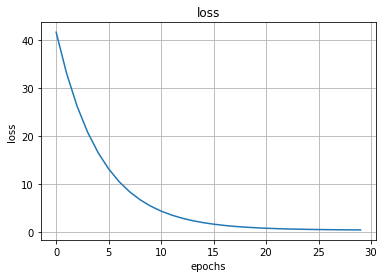

In [5]:
plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(hist.history['loss'])
plt.show()